In [1]:
import tensorflow as tf
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1 )
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1 )
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /=255
x_test /=255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 63s 32ms/step - loss: 0.2032 - accuracy: 0.9394
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0588 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0448 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0295 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 65s 34m

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0617 - accuracy: 0.9844


[0.0616636648774147, 0.9843999743461609]

In [14]:
import numpy as np

In [19]:
y_predict = model.predict(x_test)
y_predicts = np.argmax(y_predict, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicts))


313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 [==============================] - 0s 276ms/step
6


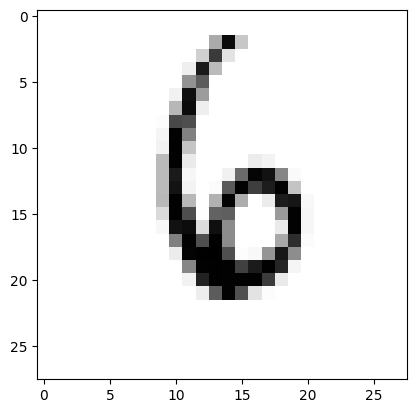

In [12]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())